# Q3. If you had to tell a story with our Cannabis data what would it be? 

(Ie. the product price decrease across categories (flower, concentrates, edibles) from Jan 1 – Aug 1, 2022 was caused by an oversaturation that is evident in the increase of total SKU count on the market.) 

If you were to get your hands on cannabis data over the past 6 months, what kind of story would you be able to tell with what evidence? 
All of this can be made up but make sure you back up your story with “fake” data that you would have handy. 

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Data: https://open.canada.ca/data/en/dataset/1f8d838e-f738-4549-8019-edfc0d931cd7

https://www.canada.ca/en/health-canada/services/drugs-medication/cannabis/research-data/market.html

In [4]:
#load data

df = pd.read_csv('hc-sc_cannabis_market_data_-_inventory_and_sales_en.csv', encoding='cp1252')
df.head(2)

,year_-_month,product_type,unpackaged_production_units,unpackaged_inventory_units,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailers,sales_units_-_medical,sales_units_-_non-medical,unpackaged_production_kilograms,unpackaged_inventory_kilograms,packaged_production_kilograms,packaged_inventory_kilograms_-_federal_licence_holders,packaged_inventory_kilograms_-_provincial_distributors_and_retailers,sales_kilograms_-_medical,sales_kilograms_-_non-medical
0,2018-10,dried cannabis / cannabis séché,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,41677,96822,13830,12310,6171,1941,4405
1,2018-11,dried cannabis / cannabis séché,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,34893,99007,11117,10410,8314,1795,5490


In [5]:
df.shape

(222, 16)

## Clean Data

In [6]:
df.dtypes

year_-_month                                                            object
product_type                                                            object
unpackaged_production_units                                             object
unpackaged_inventory_units                                              object
packaged_production_units                                               object
packaged_inventory_units_-_federal_licence_holders                      object
packaged_inventory_units_-_provincial_distributors_and_retailers        object
sales_units_-_medical                                                   object
sales_units_-_non-medical                                               object
unpackaged_production_kilograms                                         object
unpackaged_inventory_kilograms                                          object
packaged_production_kilograms                                           object
packaged_inventory_kilograms_-_federal_licence_holde

In [7]:
#features that need to be converted from object to int
feature_list = ['unpackaged_production_units',
       'unpackaged_inventory_units', 'packaged_production_units',
       'packaged_inventory_units_-_federal_licence_holders',
       'packaged_inventory_units_-_provincial_distributors_and_retailers',
       'sales_units_-_medical', 'sales_units_-_non-medical',
       'unpackaged_production_kilograms', 'unpackaged_inventory_kilograms',
       'packaged_production_kilograms',
       'packaged_inventory_kilograms_-_federal_licence_holders',
       'packaged_inventory_kilograms_-_provincial_distributors_and_retailers',
       'sales_kilograms_-_medical', 'sales_kilograms_-_non-medical']

In [8]:
df['unpackaged_production_units'].unique()

array(['n/a\xa0/ n/d', '2576671', '2353129', '2542479', '2747881',
       '2318173', '2706760', '2753562', '3070596', '3194625', '2867413',
       '2288027', '2574056', '2336037', '1965223', '2366696', '2211123',
       '2319803', '2566764', '2584721', '2953240', '3480780', '2809211',
       '2527133', '2535927', '2422372', '2683017', '2527553', '2296174',
       '2422900', '2595971', '1419889', '1274336', '1470283', '1481252',
       '1434562', '1712330', '1749090', '1647312', '1770954', '1955526',
       '1719068', '1587402', '1693769', '1171934', '1252196', '1582537',
       '1656371', '1780444', '1706217', '1834527', '1930978', '2417086',
       '2326451', '2175796', '1777893', '1871755', '1988492', '1404377',
       '1510040', '1510306'], dtype=object)

In [9]:
#replace all non numbers with nan

df.replace("n/a\xa0/ n/d", np.nan, regex=True, inplace = True)

In [10]:
#check that it worked
df['unpackaged_production_units'].unique()

array([nan, '2576671', '2353129', '2542479', '2747881', '2318173',
       '2706760', '2753562', '3070596', '3194625', '2867413', '2288027',
       '2574056', '2336037', '1965223', '2366696', '2211123', '2319803',
       '2566764', '2584721', '2953240', '3480780', '2809211', '2527133',
       '2535927', '2422372', '2683017', '2527553', '2296174', '2422900',
       '2595971', '1419889', '1274336', '1470283', '1481252', '1434562',
       '1712330', '1749090', '1647312', '1770954', '1955526', '1719068',
       '1587402', '1693769', '1171934', '1252196', '1582537', '1656371',
       '1780444', '1706217', '1834527', '1930978', '2417086', '2326451',
       '2175796', '1777893', '1871755', '1988492', '1404377', '1510040',
       '1510306'], dtype=object)

In [11]:
#correct data types

def dtype_int(df, features):
    """function to convert object dtype to int
    input: features is a list"""
    for feature in features:  
        try:
            #fill na with 0 and then convert to int
            df[feature] = df[feature].fillna(0).astype('int')
        except:
            print(feature)

dtype_int(df, feature_list)

In [12]:
df.dtypes

year_-_month                                                            object
product_type                                                            object
unpackaged_production_units                                              int32
unpackaged_inventory_units                                               int32
packaged_production_units                                                int32
packaged_inventory_units_-_federal_licence_holders                       int32
packaged_inventory_units_-_provincial_distributors_and_retailers         int32
sales_units_-_medical                                                    int32
sales_units_-_non-medical                                                int32
unpackaged_production_kilograms                                          int32
unpackaged_inventory_kilograms                                           int32
packaged_production_kilograms                                            int32
packaged_inventory_kilograms_-_federal_licence_holde

In [13]:
# Convert start_date to datetime format
df['year_-_month'] = pd.to_datetime(df['year_-_month']) 

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unpackaged_production_units,222.0,5.784288e+05,9.927940e+05,0.0,0.00,0.0,1416011.00,3480780.0
unpackaged_inventory_units,222.0,8.029895e+05,1.334872e+06,0.0,0.00,0.0,2507186.25,3991396.0
packaged_production_units,222.0,1.918608e+06,3.089097e+06,0.0,15.75,34277.0,2917188.50,12006600.0
packaged_inventory_units_-_federal_licence_holders,222.0,4.407490e+06,6.341384e+06,0.0,6.00,56069.0,8295792.50,21368801.0
packaged_inventory_units_-_provincial_distributors_and_retailers,222.0,3.006152e+06,4.794637e+06,0.0,0.00,71534.5,4734355.00,16980798.0
sales_units_-_medical,222.0,7.439455e+04,1.020878e+05,0.0,6.25,799.5,196153.25,275208.0
sales_units_-_non-medical,222.0,1.407066e+06,2.457507e+06,0.0,0.00,9741.5,1776347.50,9457655.0
unpackaged_production_kilograms,222.0,2.096229e+04,4.754687e+04,0.0,0.00,0.0,0.00,238300.0
unpackaged_inventory_kilograms,222.0,1.281805e+05,3.125172e+05,0.0,0.00,0.0,0.00,1264748.0
packaged_production_kilograms,222.0,8.132027e+02,3.534549e+03,0.0,0.00,0.0,0.00,20378.0


## EDA

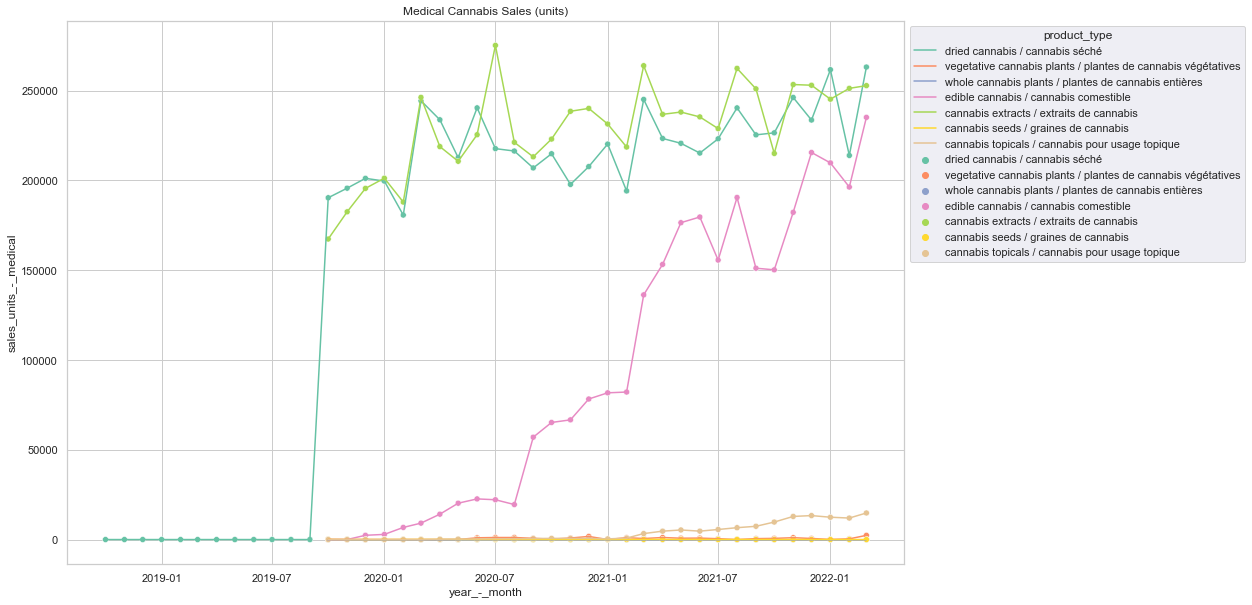

In [15]:
#Plot
fig, axs = plt.subplots(figsize = (15,10))
sns.set(palette = "Set2")

sns.lineplot(data = df, x = 'year_-_month', y = "sales_units_-_medical", hue = 'product_type', ax=axs).set(title='Medical Cannabis Sales (units)')
sns.scatterplot(data = df, x = 'year_-_month', y = "sales_units_-_medical", hue = 'product_type', ax=axs)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))

Not all the product types have data for the entire duration of the dataset. We turned the Nan into 0, but now we should turn them back to nan to avoid them in the plots

In [16]:
df.replace(0, np.nan, inplace=True)

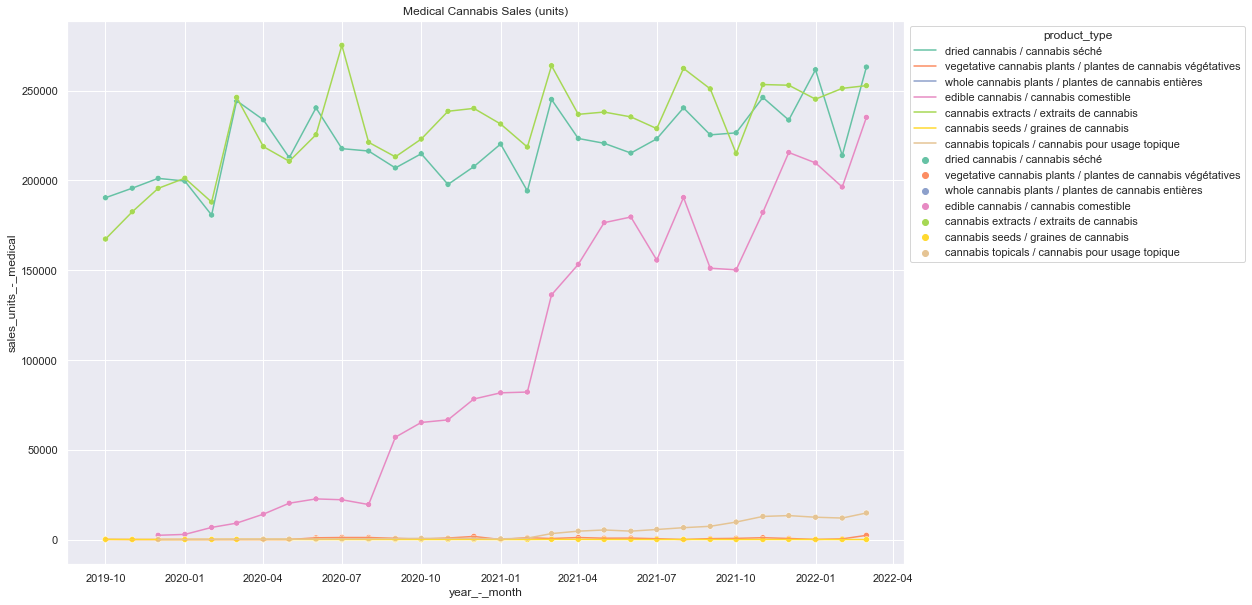

In [17]:
#Plot
fig, axs = plt.subplots(figsize = (15,10))
sns.set(style="whitegrid", palette = "Set2")

sns.lineplot(data = df, x = 'year_-_month', y = "sales_units_-_medical", hue = 'product_type', ax=axs).set(title='Medical Cannabis Sales (units)')
sns.scatterplot(data = df, x = 'year_-_month', y = "sales_units_-_medical", hue = 'product_type', ax=axs)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))

Looks like there were a few spikes in the sale of medical edibles, potential reasons:

* 2020-09 : SHRED launches in Sept 2020 (pretty popular brand) https://www.valdostadailytimes.com/ap/business/organigram-revolutionizes-hash-with-shred-x-rip-strip-hash/article_29689812-b1b5-5d30-861e-5ebee0b6cb8c.html 
* 2021-03 : 
* 2021-08 : Tilray Launches new Medical Cannabis edibles in Canada 2021-08 https://tilray.gcs-web.com/news-releases/news-release-details/tilray-launches-new-medical-cannabis-edibles-canada 
* 2021-10



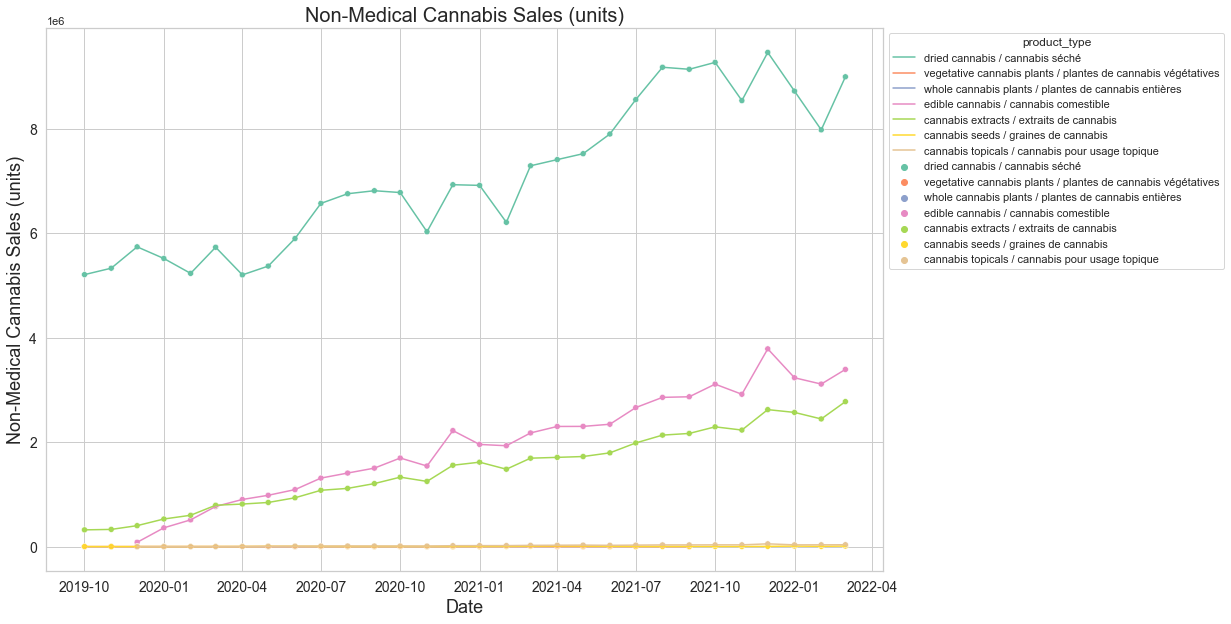

In [18]:
#Plot
fig, axs = plt.subplots(figsize = (15,10))

sns.lineplot(data = df, x = 'year_-_month', y = "sales_units_-_non-medical", hue = 'product_type', ax=axs)
sns.scatterplot(data = df, x = 'year_-_month', y = "sales_units_-_non-medical", hue = 'product_type', ax=axs)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))

plt.title('Non-Medical Cannabis Sales (units)', size=20)
plt.ylabel('Non-Medical Cannabis Sales (units)', size=18)
plt.yticks(size=14)
plt.xlabel('Date', size=18)
plt.xticks(size=14)

#plt.savefig('figures/Result_F1.png')
plt.show()

## create cumulative features:
'unpackaged_production_units',
'packaged_production_units',

'unpackaged_inventory_units', 
'packaged_inventory_units_-_federal_licence_holders',
'packaged_inventory_units_-_provincial_distributors_and_retailers',
       

'sales_units_-_medical', 
'sales_units_-_non-medical',
       
'unpackaged_production_kilograms', 
'packaged_production_kilograms',

'unpackaged_inventory_kilograms',
'packaged_inventory_kilograms_-_federal_licence_holders',
'packaged_inventory_kilograms_-_provincial_distributors_and_retailers',


'sales_kilograms_-_medical', 
'sales_kilograms_-_non-medical'

In [19]:
# can't add nan, have to switch it back to zeros
df.fillna(0, inplace=True)

In [20]:
df['production_units_total'] = df.apply(lambda x: x['unpackaged_production_units'] + x['packaged_production_units'], axis=1)

df['inventory_units_total'] = df.apply(lambda x: x['unpackaged_inventory_units'] + x['packaged_inventory_units_-_federal_licence_holders'] + x['packaged_inventory_units_-_provincial_distributors_and_retailers'], axis=1)  

df['sales_units_total'] = df.apply(lambda x: x['sales_units_-_medical'] + x['sales_units_-_non-medical'], axis=1)
       
df['production_kilograms_total'] = df.apply(lambda x: x['unpackaged_production_kilograms'] + x['packaged_production_kilograms'], axis=1)

df['inventory_kilograms_total'] = df.apply(lambda x: x['unpackaged_inventory_kilograms'] + x['packaged_inventory_kilograms_-_federal_licence_holders'] + x['packaged_inventory_kilograms_-_provincial_distributors_and_retailers'], axis=1)

df['sales_kilograms_total'] = df.apply(lambda x: x['sales_kilograms_-_medical'] + x['sales_kilograms_-_non-medical'], axis=1)

In [21]:
df.head(2).T

,0,1
year_-_month,2018-10-01 00:00:00,2018-11-01 00:00:00
product_type,dried cannabis / cannabis séché,dried cannabis / cannabis séché
unpackaged_production_units,0.0,0.0
unpackaged_inventory_units,0.0,0.0
packaged_production_units,0.0,0.0
packaged_inventory_units_-_federal_licence_holders,0.0,0.0
packaged_inventory_units_-_provincial_distributors_and_retailers,0.0,0.0
sales_units_-_medical,0.0,0.0
sales_units_-_non-medical,0.0,0.0
unpackaged_production_kilograms,41677.0,34893.0


## Cummitalive DF

In [22]:
#create df with only total features
df_totals = df[['year_-_month', 'product_type',
                'production_units_total', 
                'inventory_units_total', 
                'sales_units_total', 
                'production_kilograms_total', 
                'inventory_kilograms_total', 
                'sales_kilograms_total']]
df_totals.head()

,year_-_month,product_type,production_units_total,inventory_units_total,sales_units_total,production_kilograms_total,inventory_kilograms_total,sales_kilograms_total
0,2018-10-01,dried cannabis / cannabis séché,0.0,0.0,0.0,55507.0,115303.0,6346.0
1,2018-11-01,dried cannabis / cannabis séché,0.0,0.0,0.0,46010.0,117731.0,7285.0
2,2018-12-01,dried cannabis / cannabis séché,0.0,0.0,0.0,41388.0,130633.0,7600.0
3,2019-01-01,dried cannabis / cannabis séché,0.0,0.0,0.0,53122.0,137805.0,7307.0
4,2019-02-01,dried cannabis / cannabis séché,0.0,0.0,0.0,49424.0,143938.0,6683.0


In [23]:
df_totals.replace(0, np.nan, inplace=True)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_12664\2699708451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totals.replace(0, np.nan, inplace=True)


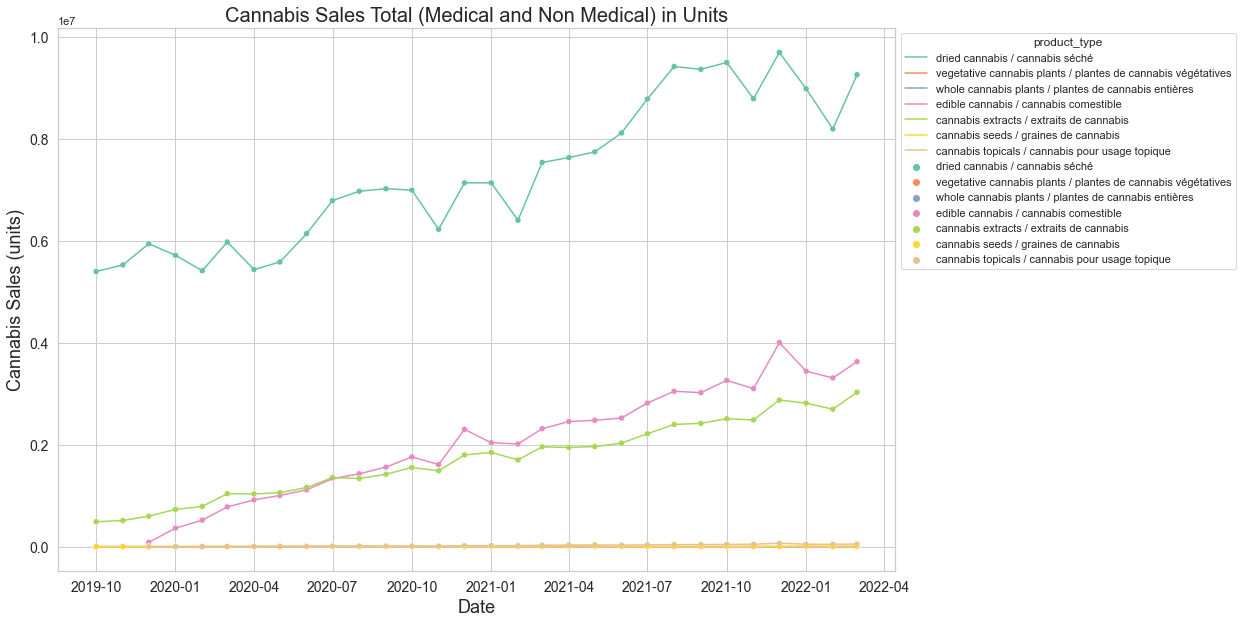

In [24]:
#Plot
fig, axs = plt.subplots(figsize = (15,10))

sns.lineplot(data = df_totals, x = 'year_-_month', y = "sales_units_total", hue = 'product_type', ax=axs)
sns.scatterplot(data = df_totals, x = 'year_-_month', y = "sales_units_total", hue = 'product_type', ax=axs)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))

plt.title('Cannabis Sales Total (Medical and Non Medical) in Units', size=20)
plt.ylabel('Cannabis Sales (units)', size=18)
plt.yticks(size=14)
plt.xlabel('Date', size=18)
plt.xticks(size=14)

#plt.savefig('figures/Result_F1.png')
plt.show()

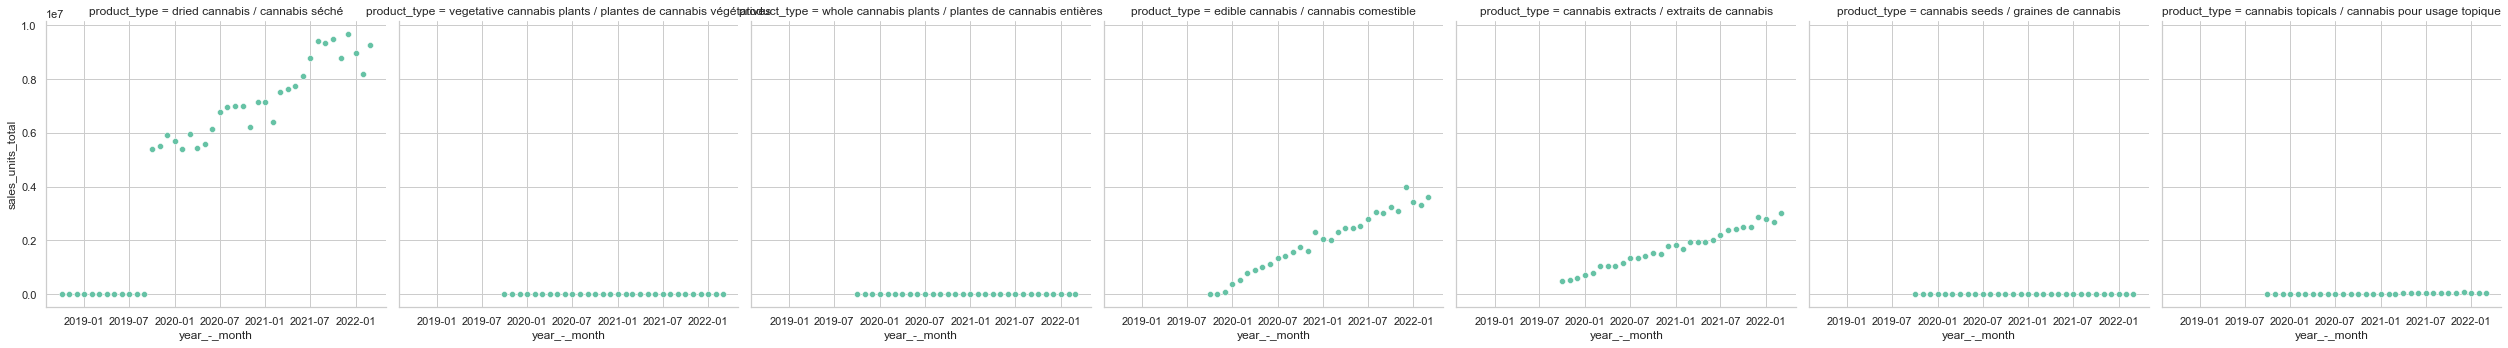

In [25]:
sns.relplot(data=df, x="year_-_month", y="sales_units_total", col="product_type")

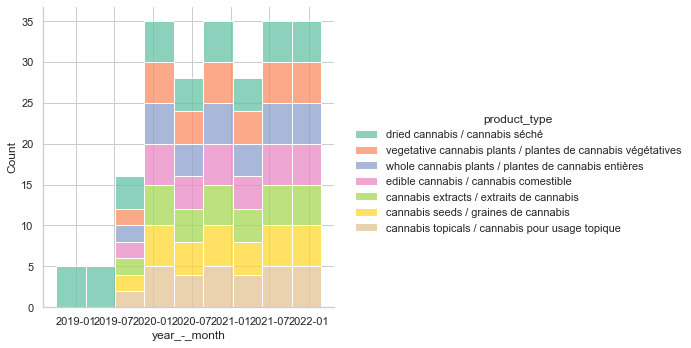

In [26]:
sns.displot(data=df, x="year_-_month", hue="product_type", multiple="stack")

# Focus on Edibles

In [27]:
df_edibles = df[df['product_type']=='edible cannabis / cannabis comestible']
df_edibles.head()

,year_-_month,product_type,unpackaged_production_units,unpackaged_inventory_units,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailers,sales_units_-_medical,sales_units_-_non-medical,unpackaged_production_kilograms,...,packaged_inventory_kilograms_-_federal_licence_holders,packaged_inventory_kilograms_-_provincial_distributors_and_retailers,sales_kilograms_-_medical,sales_kilograms_-_non-medical,production_units_total,inventory_units_total,sales_units_total,production_kilograms_total,inventory_kilograms_total,sales_kilograms_total
102,2019-10-01,edible cannabis / cannabis comestible,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,2019-11-01,edible cannabis / cannabis comestible,0.0,0.0,451027.0,451027.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,451027.0,451027.0,0.0,0.0,0.0,0.0
104,2019-12-01,edible cannabis / cannabis comestible,0.0,0.0,812793.0,547761.0,189895.0,2373.0,81698.0,0.0,...,0.0,0.0,0.0,0.0,812793.0,737656.0,84071.0,0.0,0.0,0.0
105,2020-01-01,edible cannabis / cannabis comestible,0.0,0.0,780229.0,806059.0,254024.0,2861.0,359230.0,0.0,...,0.0,0.0,0.0,0.0,780229.0,1060083.0,362091.0,0.0,0.0,0.0
106,2020-02-01,edible cannabis / cannabis comestible,0.0,0.0,1579731.0,1355031.0,688353.0,6746.0,511372.0,0.0,...,0.0,0.0,0.0,0.0,1579731.0,2043384.0,518118.0,0.0,0.0,0.0


In [28]:
df_edibles.replace(0, np.nan, inplace=True)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_12664\618664949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edibles.replace(0, np.nan, inplace=True)


In [29]:
# Percentage of Missing Values

# create a list with names of columns that containg missing values
missing = df_edibles.columns[df_edibles.isna().any()].to_list()
# Check the number of rows with missing values
missing_df = df_edibles[missing]
na_count = missing_df.isna().sum()
# Check the percentage of rows with missing values
round(na_count/len(missing_df)*100)

unpackaged_production_units                                             100.0
unpackaged_inventory_units                                              100.0
packaged_production_units                                                 3.0
packaged_inventory_units_-_federal_licence_holders                        3.0
packaged_inventory_units_-_provincial_distributors_and_retailers          7.0
sales_units_-_medical                                                     7.0
sales_units_-_non-medical                                                 7.0
unpackaged_production_kilograms                                         100.0
unpackaged_inventory_kilograms                                          100.0
packaged_production_kilograms                                           100.0
packaged_inventory_kilograms_-_federal_licence_holders                  100.0
packaged_inventory_kilograms_-_provincial_distributors_and_retailers    100.0
sales_kilograms_-_medical                                       

Drop the features missing 100%

In [30]:
df_edibles.drop(["unpackaged_production_units",
"unpackaged_inventory_units",
"unpackaged_production_kilograms",
"unpackaged_inventory_kilograms",
"packaged_production_kilograms",
"packaged_inventory_kilograms_-_federal_licence_holders",
"packaged_inventory_kilograms_-_provincial_distributors_and_retailers",
"sales_kilograms_-_medical",
"sales_kilograms_-_non-medical",
"production_kilograms_total",
"inventory_kilograms_total",
"sales_kilograms_total"], axis = 1, inplace = True)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_12664\1338186782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edibles.drop(["unpackaged_production_units",


In [31]:
df_edibles.head(3)

,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailers,sales_units_-_medical,sales_units_-_non-medical,production_units_total,inventory_units_total,sales_units_total
102,2019-10-01,edible cannabis / cannabis comestible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2019-11-01,edible cannabis / cannabis comestible,451027.0,451027.0,NaN,NaN,NaN,451027.0,451027.0,NaN
104,2019-12-01,edible cannabis / cannabis comestible,812793.0,547761.0,189895.0,2373.0,81698.0,812793.0,737656.0,84071.0


In [32]:
#drop rows that have 75% missing or higher

df_edibles[df_edibles['packaged_production_units'].isnull()]

,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailers,sales_units_-_medical,sales_units_-_non-medical,production_units_total,inventory_units_total,sales_units_total
102,2019-10-01,edible cannabis / cannabis comestible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_edibles.dropna(inplace = True, axis = 0)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_12664\2906376625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edibles.dropna(inplace = True, axis = 0)


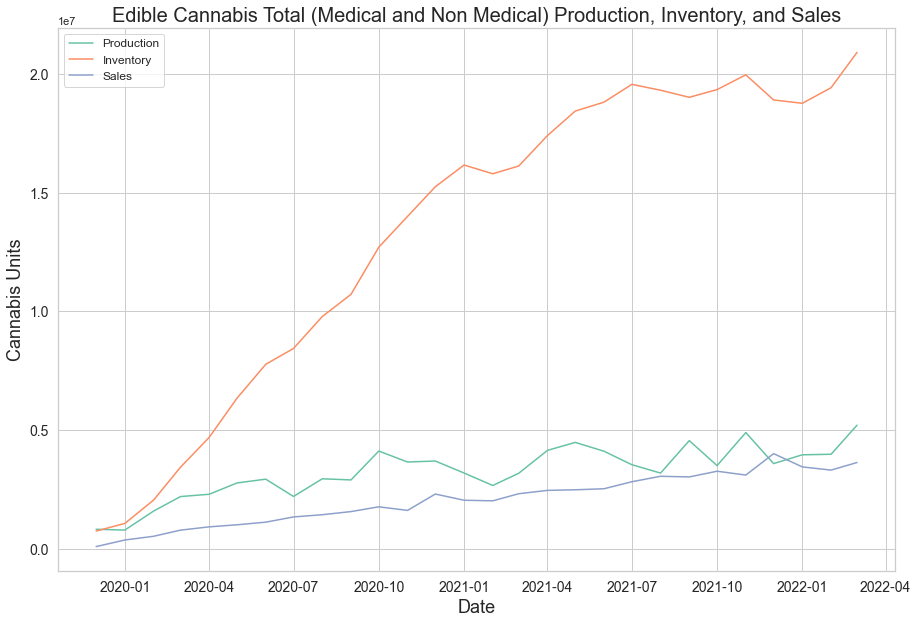

In [34]:
#Plot
fig, axs = plt.subplots(figsize = (15,10))

sns.lineplot(data = df_edibles, x = 'year_-_month', y = 'production_units_total', ax=axs)
sns.lineplot(data = df_edibles, x = 'year_-_month', y = 'inventory_units_total', ax=axs)
sns.lineplot(data = df_edibles, x = 'year_-_month', y = 'sales_units_total', ax=axs)


plt.title('Edible Cannabis Total (Medical and Non Medical) Production, Inventory, and Sales', size=20)
plt.ylabel('Cannabis Units', size=18)
plt.yticks(size=14)
plt.xlabel('Date', size=18)
plt.xticks(size=14)
plt.legend(['Production', 'Inventory', 'Sales'], fontsize=12, loc = 'upper left')

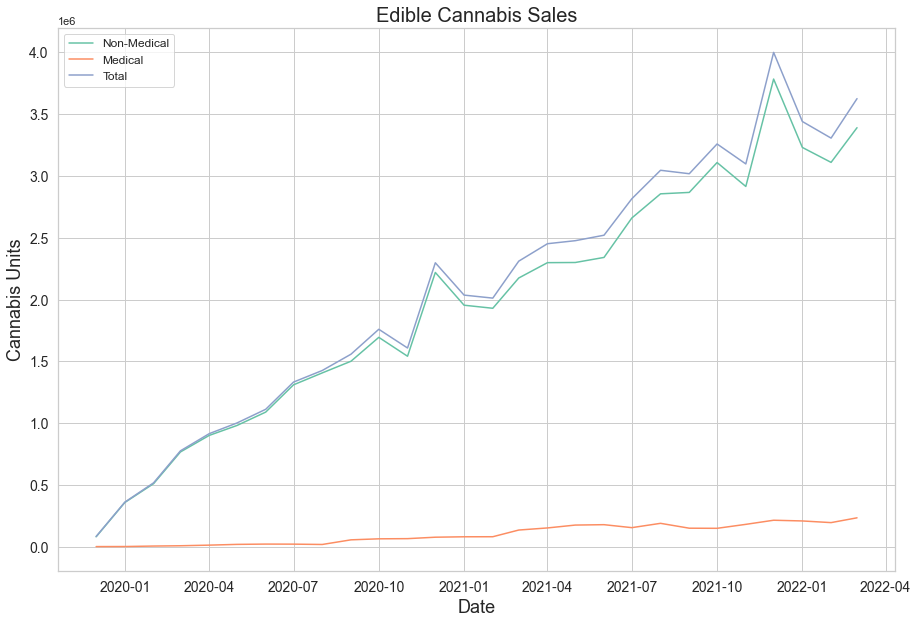

In [35]:
#Plot
fig, axs = plt.subplots(figsize = (15,10))

sns.lineplot(data = df_edibles, x = 'year_-_month', y = 'sales_units_-_non-medical', ax=axs)
sns.lineplot(data = df_edibles, x = 'year_-_month', y = 'sales_units_-_medical', ax=axs)
sns.lineplot(data = df_edibles, x = 'year_-_month', y = 'sales_units_total', ax=axs)


plt.title('Edible Cannabis Sales', size=20)
plt.ylabel('Cannabis Units', size=18)
plt.yticks(size=14)
plt.xlabel('Date', size=18)
plt.xticks(size=14)
plt.legend(['Non-Medical', 'Medical', 'Total'], fontsize=12, loc = 'upper left')

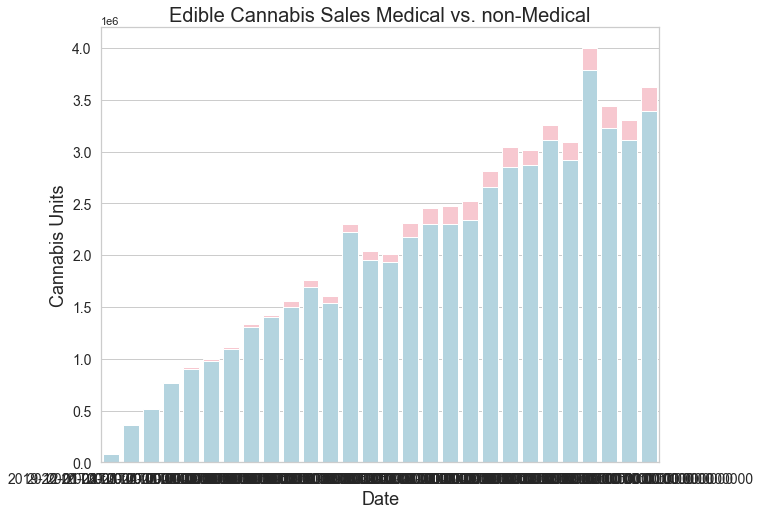

In [36]:
# bars
fig, axs = plt.subplots(figsize = (10,8))

# bar chart 1 -> top bars (medical)
sns.barplot(data=df_edibles, x="year_-_month",  y="sales_units_total", color = 'pink')
# bar chart 2 -> bottom bars (non-med)
sns.barplot(data=df_edibles, x="year_-_month",  y="sales_units_-_non-medical", color = 'lightblue')

plt.title('Edible Cannabis Sales Medical vs. non-Medical', size=20)
plt.ylabel('Cannabis Units', size=18)
plt.yticks(size=14)
plt.xlabel('Date', size=18)
plt.xticks(size=14)
plt.show()

# Story Time

In [43]:
df.replace(0, np.nan, inplace=True)

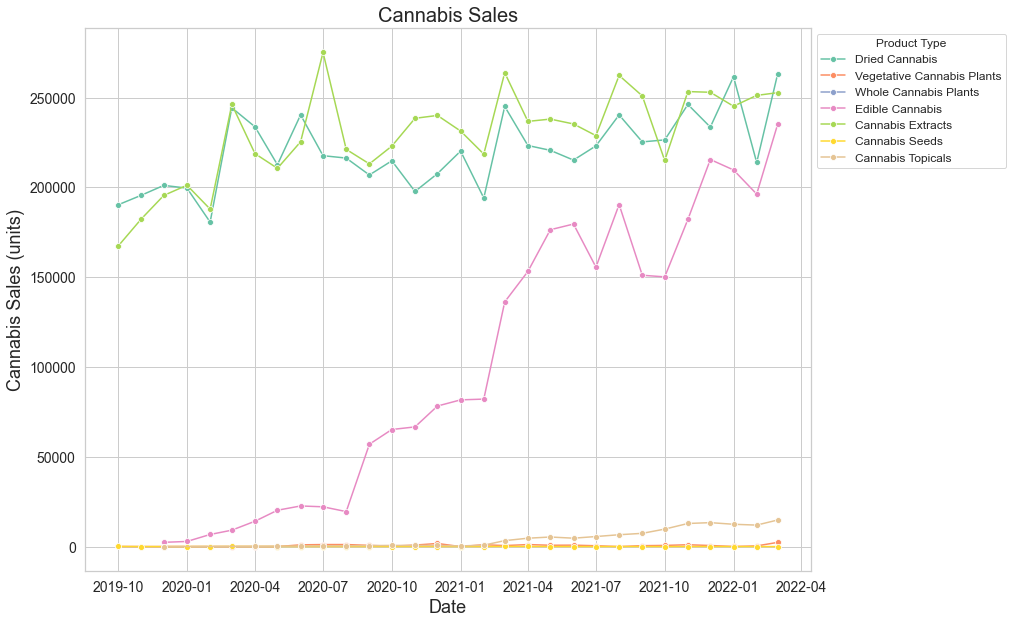

In [49]:
# let's use this plot to make up our cannabis story

#original data:
fig, axs = plt.subplots(figsize = (13,10))

product_list = ['Dried Cannabis', 'Vegetative Cannabis Plants', 'Whole Cannabis Plants', 'Edible Cannabis', 'Cannabis Extracts', 'Cannabis Seeds', 'Cannabis Topicals']

sns.lineplot(data = df, x = 'year_-_month', y = "sales_units_-_medical", marker = 'o', hue = 'product_type', ax=axs)

plt.title('Cannabis Sales', size=20)
plt.ylabel('Cannabis Sales (units)', size=18)
plt.yticks(size=14)
plt.xlabel('Date', size=18)
plt.xticks(size=14)
plt.legend(product_list, title = 'Product Type', fontsize=12, bbox_to_anchor=(1, 1))

plt.savefig('Figures/Sales.png', bbox_inches = "tight")
plt.show()

The increase in edible cannabis product sales since their legalization was caused by an increase in product availability that is evident by the increase of total SKU count on the market. The two most notable jumps being September 2020 amd March 2021. These events are followed by the company lauch of SHRED in September 2020 and Tilray's medical edibles in March 2021. 

* 2020-09 : SHRED https://www.valdostadailytimes.com/ap/business/organigram-revolutionizes-hash-with-shred-x-rip-strip-hash/article_29689812-b1b5-5d30-861e-5ebee0b6cb8c.html 
* 2021-03 : Tilray Launches new Medical Cannabis edibles in Canada https://tilray.gcs-web.com/news-releases/news-release-details/tilray-launches-new-medical-cannabis-edibles-canada 

In [59]:
#create fake SKU feature, pick arbitrary number to reduce magnitude 

df_edibles['SKU'] = df_edibles["sales_units_total"]/6126

C:\Users\3_hal\AppData\Local\Temp\ipykernel_12664\1636201055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edibles['SKU'] = df_edibles["sales_units_total"]/6126


In [56]:
#clean datetime format to only be the mont and year (drop the timezone and time)
df_edibles['year_-_month'] = df['year_-_month'].dt.to_period('M')

C:\Users\3_hal\AppData\Local\Temp\ipykernel_12664\1439997526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edibles['year_-_month'] = df['year_-_month'].dt.to_period('M')


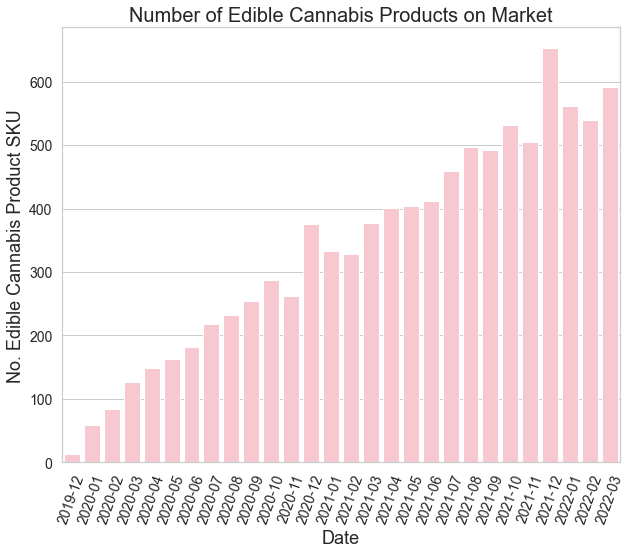

In [62]:
#make this bar plot into a mock SKU trend

# bars
fig, axs = plt.subplots(figsize = (10,8))

# bar chart 1 -> top bars (medical)
sns.barplot(data=df_edibles, x="year_-_month",  y="SKU", color = 'pink')

plt.title('Number of Edible Cannabis Products on Market', size=20)
plt.ylabel('No. Edible Cannabis Product SKU', size=18)
plt.yticks(size=14)
plt.xlabel('Date', size=18)
plt.xticks(size=14, rotation=70)

plt.savefig('Figures/SKU_fake.png', bbox_inches = "tight")
plt.show()

In [58]:
df_edibles.head()

,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailers,sales_units_-_medical,sales_units_-_non-medical,production_units_total,inventory_units_total,sales_units_total
104,2019-12,edible cannabis / cannabis comestible,812793.0,547761.0,189895.0,2373.0,81698.0,812793.0,737656.0,84071.0
105,2020-01,edible cannabis / cannabis comestible,780229.0,806059.0,254024.0,2861.0,359230.0,780229.0,1060083.0,362091.0
106,2020-02,edible cannabis / cannabis comestible,1579731.0,1355031.0,688353.0,6746.0,511372.0,1579731.0,2043384.0,518118.0
107,2020-03,edible cannabis / cannabis comestible,2191867.0,1879271.0,1547073.0,9142.0,767957.0,2191867.0,3426344.0,777099.0
108,2020-04,edible cannabis / cannabis comestible,2289280.0,2670393.0,2015202.0,14131.0,901583.0,2289280.0,4685595.0,915714.0
